# Support Vector Machines and KNN

In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn import svm
from sklearn.metrics import confusion_matrix,accuracy_score, classification_report
from sklearn.model_selection import validation_curve,KFold,cross_val_score,GridSearchCV, train_test_split

import warnings
warnings.filterwarnings("ignore")
warnings.filterwarnings(
    action="ignore",
    module="scipy",
    message="^internal gelsd"
)

In [38]:
X=pd.read_csv('cleaned_heart_data.csv',index_col=0)
y=X['target']
X=X.drop(['target'],axis=1)
X.head()

,age,sex,resting_bp,cholesterol,fasting_blood_sugar,max_heart_rate,exercise_angina,oldpeak,num_major_vessels,chest_pain_1,chest_pain_2,chest_pain_3,resting_ecg_1,resting_ecg_2,thalium_stress_test_1,thalium_stress_test_2,thalium_stress_test_3,slope_1,slope_2
0,63,1,145,233,1,150,0,2.3,0,0,0,1,0,0,1,0,0,0,0
1,37,1,130,250,0,187,0,3.5,0,0,1,0,1,0,0,1,0,0,0
2,41,0,130,204,0,172,0,1.4,0,1,0,0,0,0,0,1,0,0,1
3,56,1,120,236,0,178,0,0.8,0,1,0,0,1,0,0,1,0,0,1
4,57,0,120,354,0,163,1,0.6,0,0,0,0,1,0,0,1,0,0,1


In [39]:
#first let's check the base
from sklearn.pipeline import make_pipeline
from sklearn import preprocessing
svm_base = make_pipeline(preprocessing.StandardScaler(), svm.SVC(C=1))
svm_base_score=cross_val_score(svm_base, X, y, cv=3)
print("Average Accuracy for baseline model: \t {0:.4f}".format(np.mean(svm_base_score)))
print("Accuracy SD: \t\t {0:.4f}".format(np.std(svm_base_score)))

Average Accuracy for baseline model: 	 0.8251
Accuracy SD: 		 0.0365


# Tuning SVM model
I am tuning the following features to get the best score
    - 'C'
    - 'gamma'

In [4]:
# tuning params
params = {"SVM__C": [0.0001, 0.001, 0.1, 1, 10, 100, 1000],
          "SVM__gamma" :[0.00001,0.0001, 0.001, 0.1, 1, 10, 100]}

folds = KFold(n_splits = 3, shuffle = True, random_state = 99)

# specify scores/metrics in an iterable
scores = ['recall','precision','accuracy']

steps = [('scaler', StandardScaler()), ('SVM', SVC(kernel = 'linear'))]
from sklearn.pipeline import Pipeline
pipeline = Pipeline(steps)

for score in scores:
    # set up GridSearch for score metric
    svm = GridSearchCV(pipeline, 
                       params, 
                       cv=folds,
                       scoring=score,
                       return_train_score=True)
    # fit the model
    svm.fit(X, y)

    print(" The highest {0} score is {1:.4f}  {2}".format(score, svm.best_score_, svm.best_params_))
    print("\n")

 The highest recall score is 1.0000  {'SVM__C': 0.0001, 'SVM__gamma': 1e-05}


 The highest precision score is 0.8126  {'SVM__C': 100, 'SVM__gamma': 1e-05}


 The highest accuracy score is 0.8218  {'SVM__C': 100, 'SVM__gamma': 1e-05}




### The highest accuracy score is 0.8218 with {'C': 100, 'gamma': 1e-05}

In [5]:
# results of grid search CV
cv_results = pd.DataFrame(svm.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_SVM__C,param_SVM__gamma,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,0.008011,0.004467,0.001855,0.000348,0.0001,1e-05,"{'SVM__C': 0.0001, 'SVM__gamma': 1e-05}",0.623762,0.524752,0.485149,0.544554,0.058295,43,0.504950,0.554455,0.574257,0.544554,0.029148
1,0.005300,0.000841,0.001680,0.000089,0.0001,0.0001,"{'SVM__C': 0.0001, 'SVM__gamma': 0.0001}",0.623762,0.524752,0.485149,0.544554,0.058295,43,0.504950,0.554455,0.574257,0.544554,0.029148
2,0.008515,0.003431,0.003430,0.001328,0.0001,0.001,"{'SVM__C': 0.0001, 'SVM__gamma': 0.001}",0.623762,0.524752,0.485149,0.544554,0.058295,43,0.504950,0.554455,0.574257,0.544554,0.029148
3,0.006178,0.002375,0.002569,0.001014,0.0001,0.1,"{'SVM__C': 0.0001, 'SVM__gamma': 0.1}",0.623762,0.524752,0.485149,0.544554,0.058295,43,0.504950,0.554455,0.574257,0.544554,0.029148
4,0.009286,0.003833,0.002815,0.001091,0.0001,1,"{'SVM__C': 0.0001, 'SVM__gamma': 1}",0.623762,0.524752,0.485149,0.544554,0.058295,43,0.504950,0.554455,0.574257,0.544554,0.029148
5,0.009124,0.002685,0.002557,0.000113,0.0001,10,"{'SVM__C': 0.0001, 'SVM__gamma': 10}",0.623762,0.524752,0.485149,0.544554,0.058295,43,0.504950,0.554455,0.574257,0.544554,0.029148
6,0.010590,0.004172,0.005929,0.003758,0.0001,100,"{'SVM__C': 0.0001, 'SVM__gamma': 100}",0.623762,0.524752,0.485149,0.544554,0.058295,43,0.504950,0.554455,0.574257,0.544554,0.029148
7,0.010169,0.005394,0.004218,0.002533,0.001,1e-05,"{'SVM__C': 0.001, 'SVM__gamma': 1e-05}",0.851485,0.673267,0.544554,0.689769,0.125846,36,0.792079,0.797030,0.638614,0.742574,0.073539
8,0.011097,0.006752,0.006770,0.004970,0.001,0.0001,"{'SVM__C': 0.001, 'SVM__gamma': 0.0001}",0.851485,0.673267,0.544554,0.689769,0.125846,36,0.792079,0.797030,0.638614,0.742574,0.073539
9,0.010645,0.003817,0.002745,0.000950,0.001,0.001,"{'SVM__C': 0.001, 'SVM__gamma': 0.001}",0.851485,0.673267,0.544554,0.689769,0.125846,36,0.792079,0.797030,0.638614,0.742574,0.073539


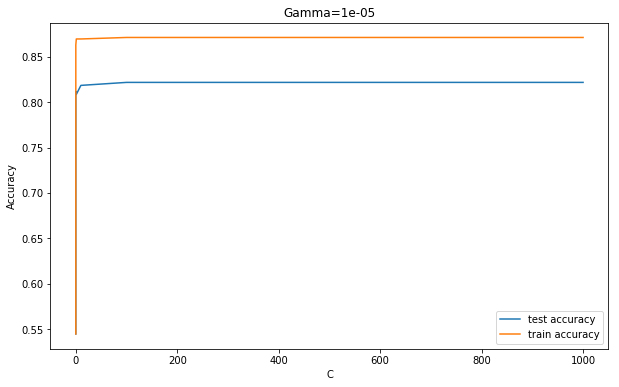

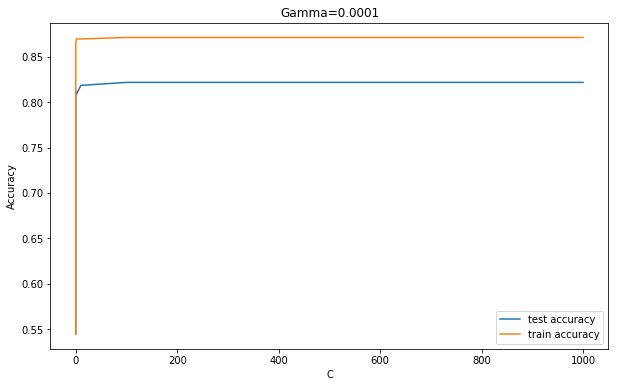

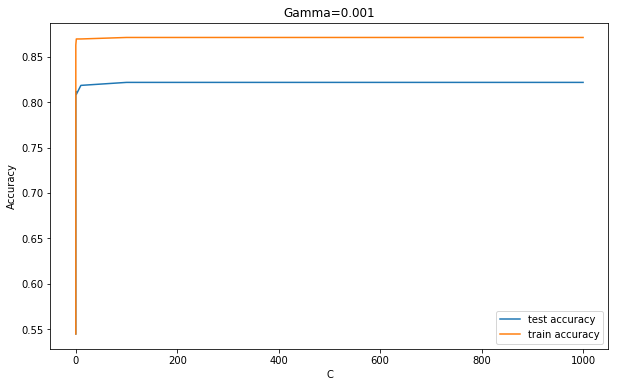

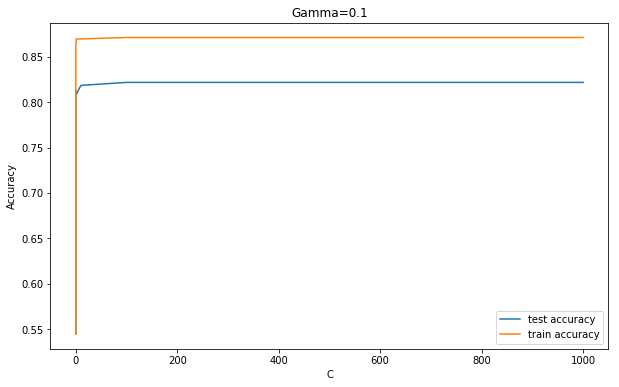

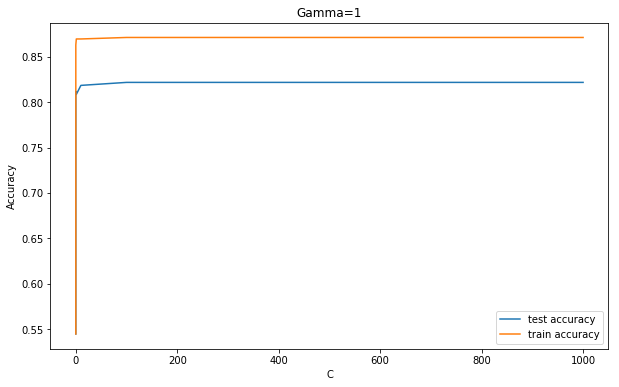

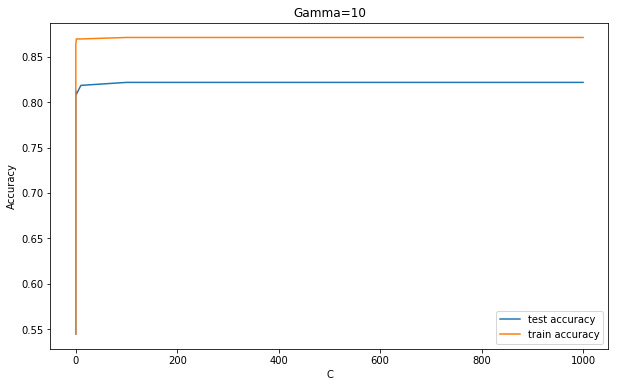

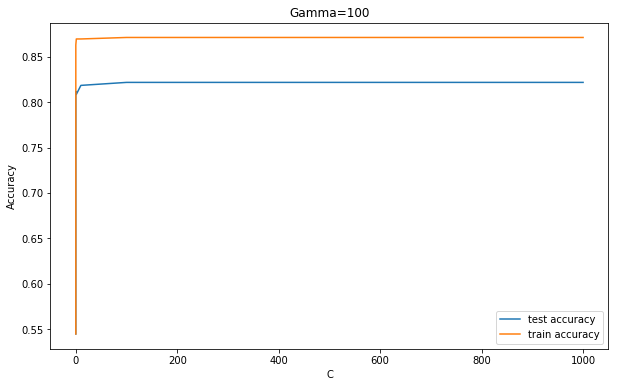

In [10]:
cv_results['param_SVM__C'] = cv_results['param_SVM__C'].astype('int')
for gamma in [0.00001,0.0001, 0.001, 0.1, 1, 10,100]:
    plt.figure(figsize=(10,6))
    gamma_01 = cv_results[cv_results['param_SVM__gamma']==gamma]

    plt.plot(gamma_01["param_SVM__C"], gamma_01["mean_test_score"])
    plt.plot(gamma_01["param_SVM__C"], gamma_01["mean_train_score"])
    plt.xlabel('C')
    plt.ylabel('Accuracy')
    plt.title("Gamma={}".format(gamma))
    plt.legend(['test accuracy', 'train accuracy'], loc='bottom right')

In [11]:
## The highest accuracy score 
final_svm=cv_results['mean_test_score'].max()
print(" The highest SVM accuracy score is {0:.4f} when the kernel is linear.".format(final_svm))

 The highest SVM accuracy score is 0.8218 when the kernel is linear.


# The highest tuned SVM accuracy score is 0.8218

----

# Tuning KNN model

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
%matplotlib inline

In [13]:
X=pd.read_csv('cleaned_heart_data.csv',index_col=0)
y=X['target']
X=X.drop(['target'],axis=1)
X.head()

,age,sex,resting_bp,cholesterol,fasting_blood_sugar,max_heart_rate,exercise_angina,oldpeak,num_major_vessels,chest_pain_1,chest_pain_2,chest_pain_3,resting_ecg_1,resting_ecg_2,thalium_stress_test_1,thalium_stress_test_2,thalium_stress_test_3,slope_1,slope_2
0,63,1,145,233,1,150,0,2.3,0,0,0,1,0,0,1,0,0,0,0
1,37,1,130,250,0,187,0,3.5,0,0,1,0,1,0,0,1,0,0,0
2,41,0,130,204,0,172,0,1.4,0,1,0,0,0,0,0,1,0,0,1
3,56,1,120,236,0,178,0,0.8,0,1,0,0,1,0,0,1,0,0,1
4,57,0,120,354,0,163,1,0.6,0,0,0,0,1,0,0,1,0,0,1


In [18]:
from sklearn import neighbors
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix,accuracy_score, classification_report
from sklearn.model_selection import validation_curve,KFold,cross_val_score,GridSearchCV, train_test_split
import numpy as np

for num in range(2,50):
    knn = KNeighborsClassifier(n_neighbors=num)
  
    knn_pipeline = make_pipeline(preprocessing.StandardScaler(), knn)
    res = cross_val_score(knn_pipeline, X, y, cv=3, scoring='accuracy')
    print("Num Neighbors",num,"-->", "Average Accuracy: \t {0:.4f}".format(np.mean(res)))

Num Neighbors 2 --> Average Accuracy: 	 0.7624
Num Neighbors 3 --> Average Accuracy: 	 0.7855
Num Neighbors 4 --> Average Accuracy: 	 0.8020
Num Neighbors 5 --> Average Accuracy: 	 0.8284
Num Neighbors 6 --> Average Accuracy: 	 0.8185
Num Neighbors 7 --> Average Accuracy: 	 0.8317
Num Neighbors 8 --> Average Accuracy: 	 0.8251
Num Neighbors 9 --> Average Accuracy: 	 0.8317
Num Neighbors 10 --> Average Accuracy: 	 0.8317
Num Neighbors 11 --> Average Accuracy: 	 0.8284
Num Neighbors 12 --> Average Accuracy: 	 0.8152
Num Neighbors 13 --> Average Accuracy: 	 0.8119
Num Neighbors 14 --> Average Accuracy: 	 0.8218
Num Neighbors 15 --> Average Accuracy: 	 0.8185
Num Neighbors 16 --> Average Accuracy: 	 0.8251
Num Neighbors 17 --> Average Accuracy: 	 0.8284
Num Neighbors 18 --> Average Accuracy: 	 0.8251
Num Neighbors 19 --> Average Accuracy: 	 0.8251
Num Neighbors 20 --> Average Accuracy: 	 0.8251
Num Neighbors 21 --> Average Accuracy: 	 0.8185
Num Neighbors 22 --> Average Accuracy: 	 0.8185


In [35]:
#Adding the best n_neighbors value of 42
knn = KNeighborsClassifier(n_neighbors=42)
  
knn_pipeline = make_pipeline(preprocessing.StandardScaler(), knn)
res = cross_val_score(knn_pipeline, X, y, cv=3)
print("n_neighbors of 42 has an Average Accuracy score: {0:.4f}".format(np.mean(res)))

n_neighbors of 42 has an Average Accuracy score: 0.8350


# KNN with n_neighbors = 42 has an Average Accuracy score: 0.8350
